In [65]:
#from tensorflow.keras import models
from tensorflow.keras.models import load_model

In [66]:
pwd

'/Users/karimelbana/SolarOdyssey/rrep-nigeria'

In [67]:
model = load_model('models/RegressionDensenet121/model_val_loss_2829.130126953125.h5', compile=False)

In [68]:
#loaded_model = models.load_model('models/RegressionDensenet121/model_val_loss_2829.130126953125.h5')

In [69]:
import pandas as pd
df_masked_cat = pd.read_csv('df_masked_cat.csv')

In [70]:
from os import walk

data_path = 'data/initial_set'

f = []
for (dirpath, dirnames, filenames) in walk(data_path):
    f.extend(filenames)
    break

In [71]:
images_ids = []
for Id in filenames:
  Id = int(Id.strip('.png'))
  images_ids.append(id)

#images_ids

In [72]:
y = []
for Id in images_ids:
  #print(id)
  y.append(int(df_masked_cat[df_masked_cat['Id'] == Id].Demand.values[0]))
    
len(y)

1299

In [73]:
def load_sattelite_images(data_path, data_folder, y):
        
    data_path = data_path
    y = np.array(y)
    imgs = []
    images_path = [os.path.join(data_folder, elt) for elt in os.listdir(os.path.join(data_path)) if elt.find('.png')>0]
    #print(images_path)
    for path in images_path:
        if os.path.exists(path):
            image = Image.open(path)
            #image = image.resize((256, 256))
            imgs.append(np.array(image))

    X = np.array(imgs)
    #print(X.shape)
    
    X_train, X_sub, y_train, y_sub = train_test_split(X, y, test_size=0.40, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_sub, y_sub, test_size=0.20, random_state=42)

    #first_split = int(len(imgs) * .6)
    #second_split = first_split + int(len(imgs) * 0.2)

    #X_train, X_val, X_test = X[:first_split], X[first_split:second_split], X[second_split:]
    #y_train, y_val, y_test = y[:first_split], y[first_split:second_split], y[second_split:]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [74]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from PIL import Image

data_path = 'data/initial_set'
data_folder = 'data/initial_set'
X_train, y_train, X_val, y_val, X_test, y_test = load_sattelite_images(data_path, data_folder, y)
print(X_train.shape, X_val.shape, X_test.shape)

(779, 512, 512, 3) (416, 512, 512, 3) (104, 512, 512, 3)


In [75]:
#from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.applications.densenet import preprocess_input as preprocess_input_densenet

#Preprocess to match VGG16 or resnet50

model_selected = 'densenet'

if model_selected == 'vgg16':
  X_train_proc = preprocess_input(X_train) 
  X_val_proc = preprocess_input(X_val)
  X_test_proc = preprocess_input(X_test)

elif model_selected == 'resnet50':
  X_train_proc = preproc_res(X_train) 
  X_val_proc = preproc_res(X_val)
  X_test_proc = preproc_res(X_test)

elif model_selected == 'densenet':
    X_train_proc = preprocess_input_densenet(X_train) 
    X_val_proc = preprocess_input_densenet(X_val)
    X_test_proc = preprocess_input_densenet(X_test)

In [76]:
X_test[0].shape

(512, 512, 3)

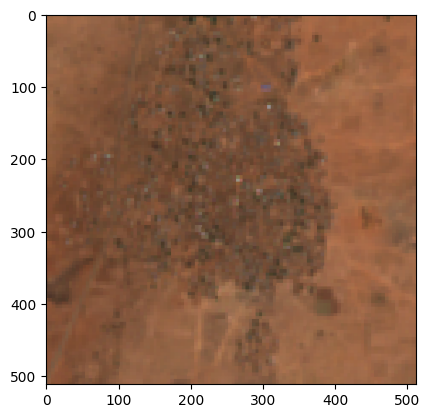

In [77]:
import matplotlib.pyplot as plt

plt.imshow(X_test[5])

In [78]:
test = np.expand_dims(X_test_proc[5], axis=0)

In [79]:
y_pred = model.predict(test)
y_pred

1/1 [==============================] - 1s 973ms/step


array([[115.1044]], dtype=float32)

In [64]:
round(y_pred[0][0],1)

5.3